In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
np.random.seed(6754)

In [4]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# dropping Prospect ID and Lead Number columns as they are not relevant

df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [6]:
# separating numerical and categorical columns

cat = [x for x in df.columns if df[x].dtype == 'O']
num = [x for x in df.columns if x not in cat]

In [7]:
# 'Select' class in different columns is equivalent to null, changing it to null

for i in range(len(cat)):
    
    try:
        df.loc[(df[cat[i]]=='Select'),cat[i]] = np.nan
    
    except:
        pass

In [8]:
# checking null again

df.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [9]:
# dropping columns with more than 30% missing values
null = [x for x in df.columns if df[x].isnull().mean()>0.30]
null

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
df.drop(columns=null,inplace=True)

In [11]:
df.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [12]:
## Dropping columns with majority of category is coming under a single type which is not useful for the model to learn. Hence dropping those.

In [13]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [14]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
df.drop(columns=['What matters most to you in choosing a course','What is your current occupation','Country'],inplace=True)

In [17]:
df.isnull().mean()

Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.000000
Get updates on DM Content                   0.

In [18]:
df.shape

(9240, 22)

In [19]:
# since null values in 4 columns is less than 1.5% percent dropping rows which contain null
df = df.dropna()
df.shape

(9074, 22)

In [20]:
# separating numerical and categorical columns
cat = [x for x in df.columns if df[x].dtype == 'O']
num = [x for x in df.columns if x not in cat]

In [21]:
# finding unique values in categorical columns
df[cat].nunique()

Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Last Activity                               17
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [22]:
df.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

In [23]:
# droping columns with only one unique value because those columns are not useful
drop2 = [x for x in cat if df[x].nunique()==1]
drop2

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [24]:
df.drop(columns=drop2,inplace=True)

In [25]:
cat = list(set(cat)-set(drop2))

In [26]:
df[cat].nunique()

Newspaper                                  2
Newspaper Article                          2
Search                                     2
X Education Forums                         2
Do Not Email                               2
Last Activity                             17
Lead Origin                                4
A free copy of Mastering The Interview     2
Lead Source                               21
Digital Advertisement                      2
Last Notable Activity                     16
Do Not Call                                2
Through Recommendations                    2
dtype: int64

In [27]:
# checking datatypes

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Search                                  9074 non-null   object 
 10  Newspaper Article                       9074 non-null   obje

In [29]:
df[cat].head(2)

,Newspaper,Newspaper Article,Search,X Education Forums,Do Not Email,Last Activity,Lead Origin,A free copy of Mastering The Interview,Lead Source,Digital Advertisement,Last Notable Activity,Do Not Call,Through Recommendations
0,No,No,No,No,No,Page Visited on Website,API,No,Olark Chat,No,Modified,No,No
1,No,No,No,No,No,Email Opened,API,No,Organic Search,No,Email Opened,No,No


In [30]:
df[num].head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5


In [31]:
# datatypes seems proper(except Converted column,which is our target. We r leaving it as itis)
#,no need to reassign

In [32]:
df.shape

(9074, 17)

In [33]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [34]:
# RENAMING COLUMN FOR BETTER PROGRAMMING
df.columns =['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity', 'Search', 'Newspaper_Article',
       'X_Education_Forums', 'Newspaper', 'Digital_Advertisement',
       'Through_Recommendations', 'A_free_copy_of_Mastering_The_Interview',
       'Last_Notable_Activity']

In [35]:
# separating numerical and categorical columns
cat = [x for x in df.columns if df[x].dtype == 'O']
num = [x for x in df.columns if x not in cat]

In [36]:
df1 = df.copy()

# EDA

## Univariate analysis of numerical columns

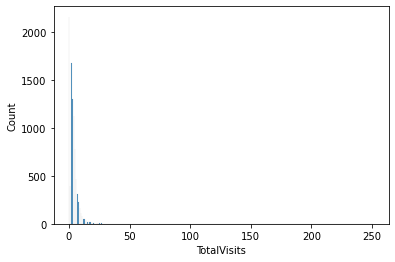

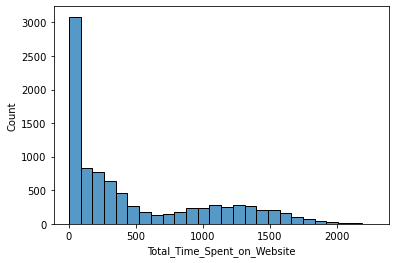

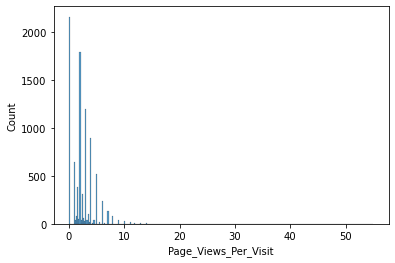

In [37]:
# Histogram plot to visualize distribution

for i in num:
    
    if i != 'Converted':
        
        plt.figure()
        sns.histplot(data=df,x=i)

In [38]:
# all variables are skewed

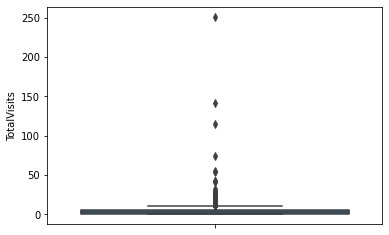

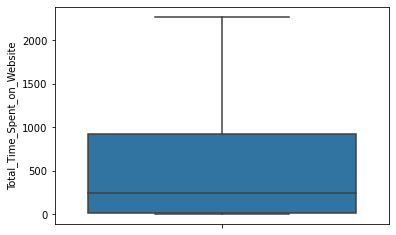

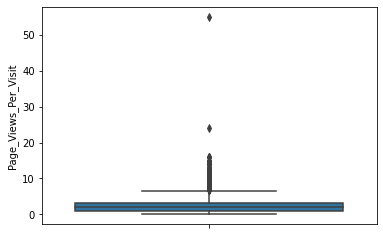

In [39]:
# Boxplot for visualizing outliers
for i in num:
    
    if i != 'Converted':
        
        plt.figure()
        sns.boxplot(data=df,y=i)

## Univatiate Analysis for categorical columns

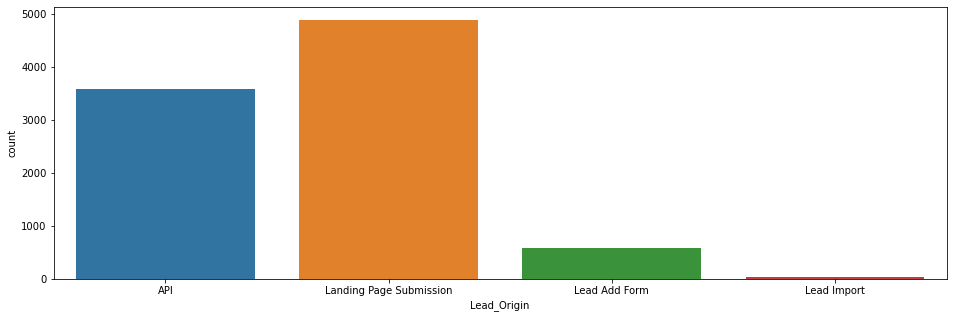

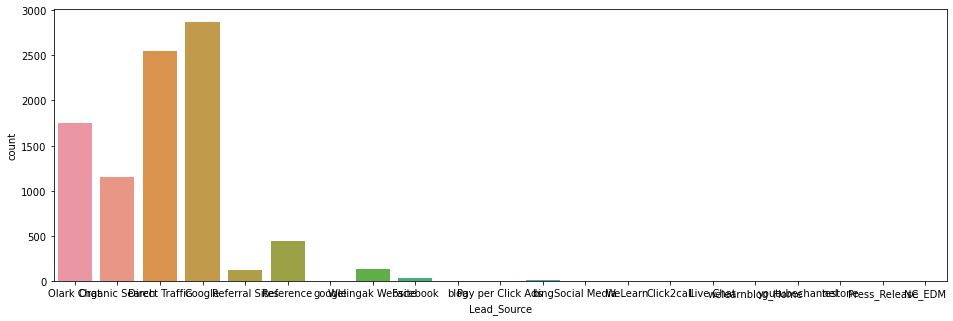

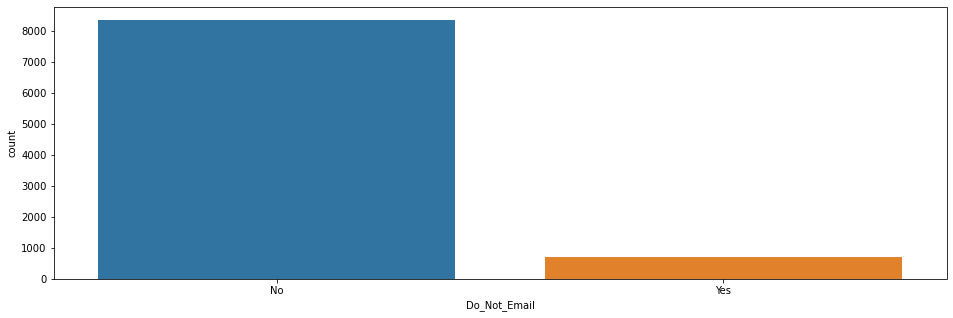

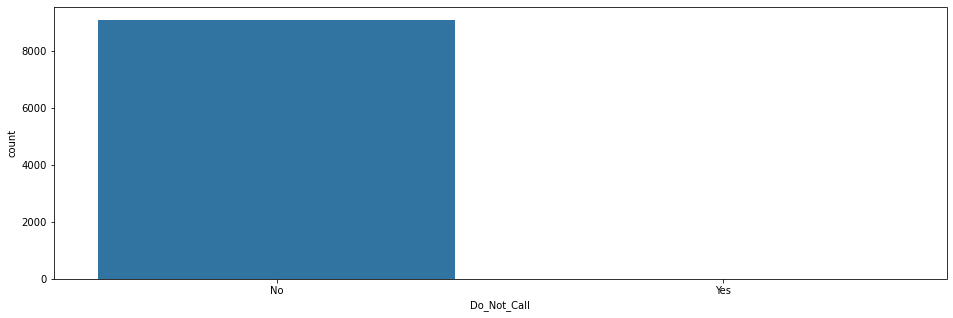

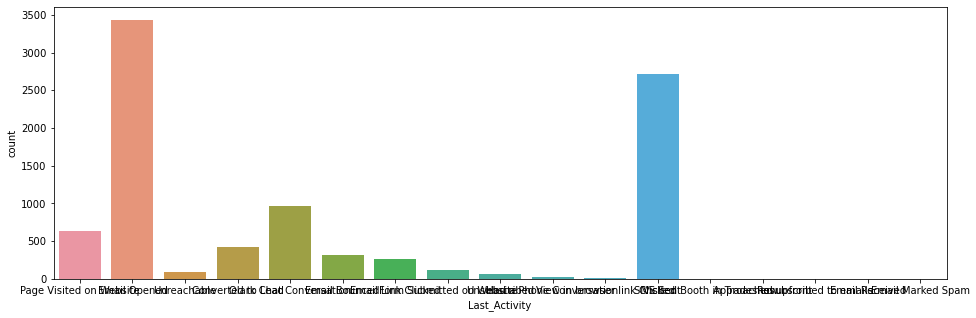

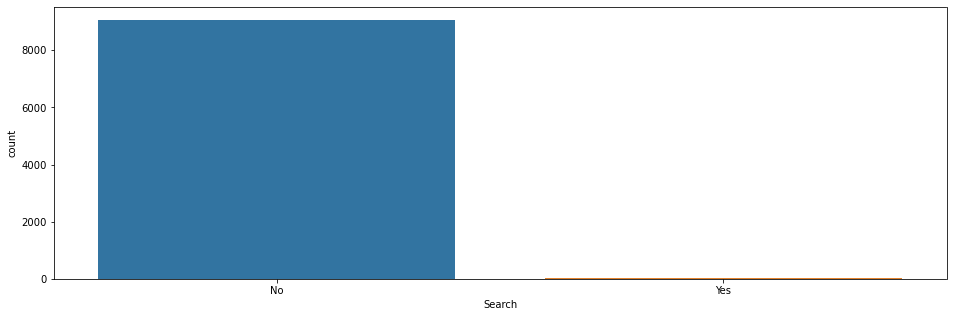

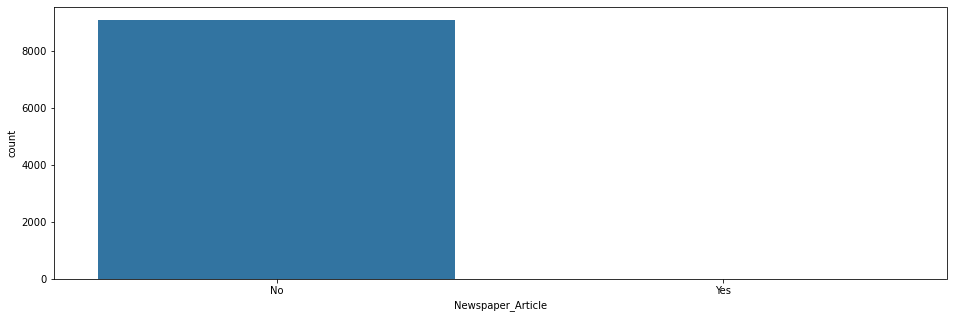

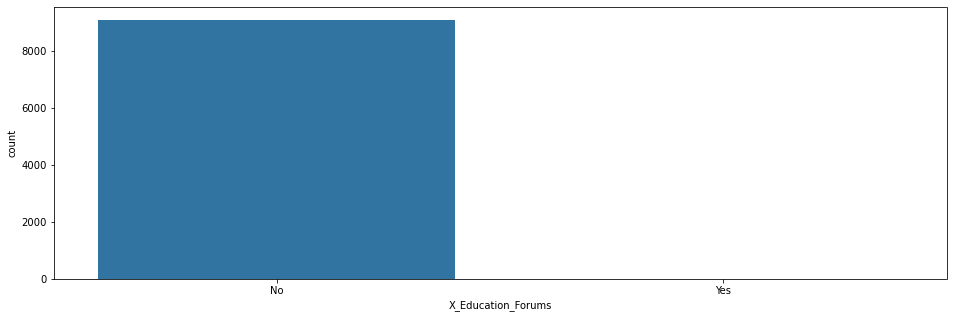

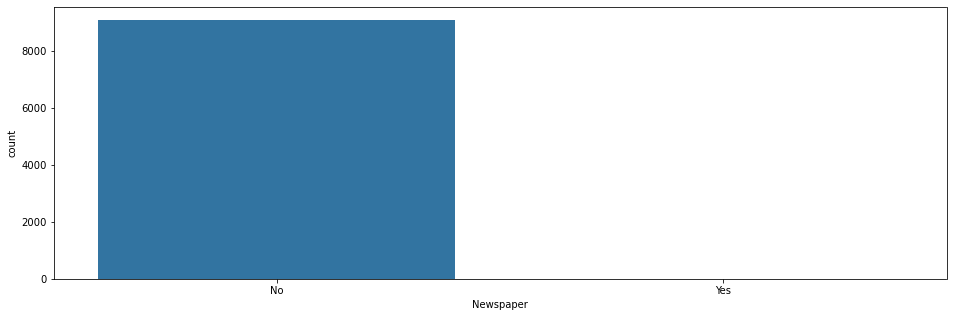

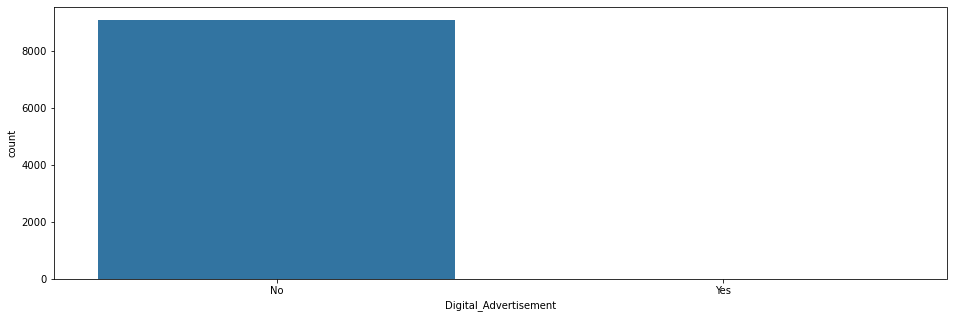

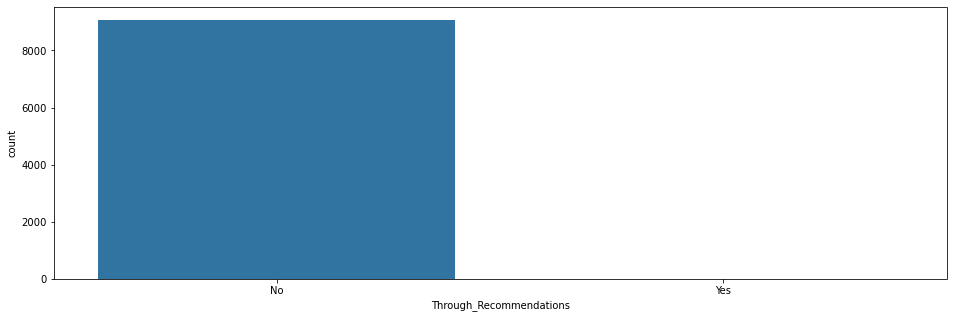

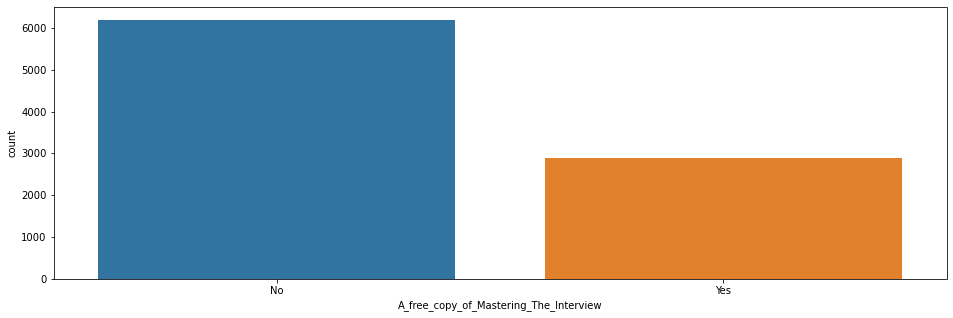

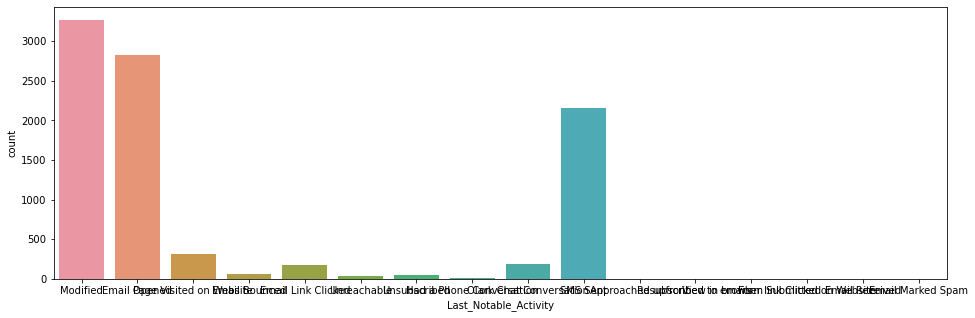

In [40]:
# Count plot to see counts
for i in cat:
    
    plt.figure(figsize=(16,5))
    sns.countplot(data=df,x=i)

In [41]:
## Converting the small chunks of data as others for better visualizing.
df['Last_Activity'].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last_Activity, dtype: float64

In [42]:
## Converting the small chunks of data as others for better visualizing.
df['Last_Activity'].value_counts(normalize=True)
df['Last_Activity'].replace(to_replace=['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],value='Others', inplace=True)

<AxesSubplot:>

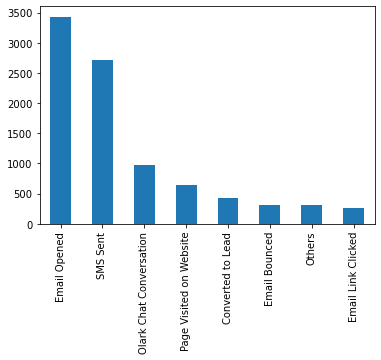

In [43]:
df['Last_Activity'].value_counts().plot.bar()

In [44]:
## Converting the small chunks of data as others for better visualizing.
df['Last_Notable_Activity'].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last_Notable_Activity, dtype: float64

In [45]:
df['Last_Notable_Activity'].replace(to_replace=['po','Email Bounced','Unsubscribed',
                            'Unreachable','Had a Phone Conversation','Email Marked Spam',
                            'Approached upfront','Resubscribed to emails',
                            'View in browser link Clicked','Form Submitted on Website',
                                                'Email Received'],value='Others', 
                                               inplace=True)

<AxesSubplot:>

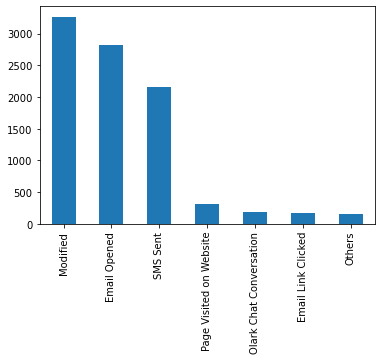

In [46]:
df['Last_Notable_Activity'].value_counts().plot.bar()

In [47]:
df['Lead_Source'].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead_Source, dtype: float64

In [48]:
## Imputing similar data for better understanding and 
## Converting to 'Others' for better visualization
df['Lead_Source'].replace(to_replace=['welearnblog_Home','WeLearn','blog'],
                          value='We Learn Blog',inplace=True)
df['Lead_Source'].replace(to_replace='google',value='Google',inplace=True)
df['Lead_Source'].replace(to_replace=['Facebook','youtubechannel'],
                          value='Social Media',inplace=True)

In [49]:
df['Lead_Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Social Media           34
bing                    6
Click2call              4
We Learn Blog           3
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [50]:
df['Lead_Source'].replace(to_replace=['Social Media','bing','Click2call','Live Chat','We Learn Blog','Pay per Click Ads','testone','Press_Release','NC_EDM'], value='Others',inplace=True)

<AxesSubplot:>

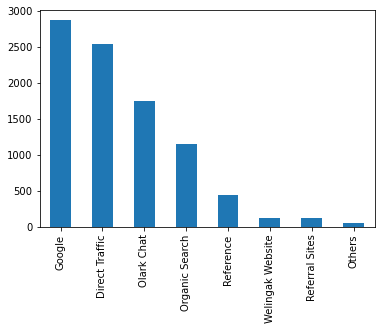

In [51]:
df['Lead_Source'].value_counts().plot.bar()

In [52]:
# Percentage of data in each class
for i in cat:
    
    print('\n')
    print('COLUMN NAME:',i)
    print(df[i].value_counts(normalize=True))
    print('\n')



COLUMN NAME: Lead_Origin
Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead_Origin, dtype: float64




COLUMN NAME: Lead_Source
Google              0.316619
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Welingak Website    0.014216
Referral Sites      0.013776
Others              0.005951
Name: Lead_Source, dtype: float64




COLUMN NAME: Do_Not_Email
No     0.921093
Yes    0.078907
Name: Do_Not_Email, dtype: float64




COLUMN NAME: Do_Not_Call
No     0.99978
Yes    0.00022
Name: Do_Not_Call, dtype: float64




COLUMN NAME: Last_Activity
Email Opened               0.378223
SMS Sent                   0.299317
Olark Chat Conversation    0.107119
Page Visited on Website    0.070531
Converted to Lead          0.047168
Email Bounced              0.034384
Others                     0.033833
Email Link Clicked         

# Multivariate analysis

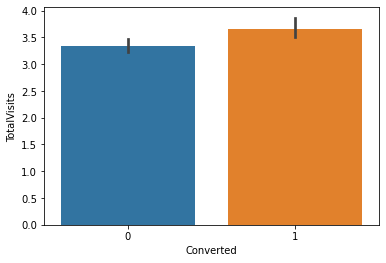

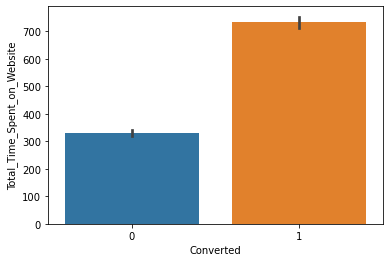

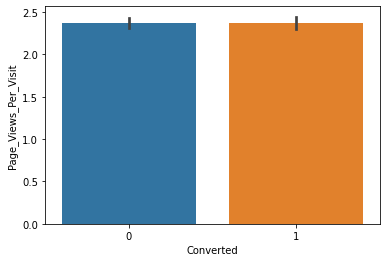

In [53]:
# Target and numerical columns

for i in num:
    
    if i != 'Converted':
        
        plt.figure()
        sns.barplot(data=df,y=i,x='Converted')

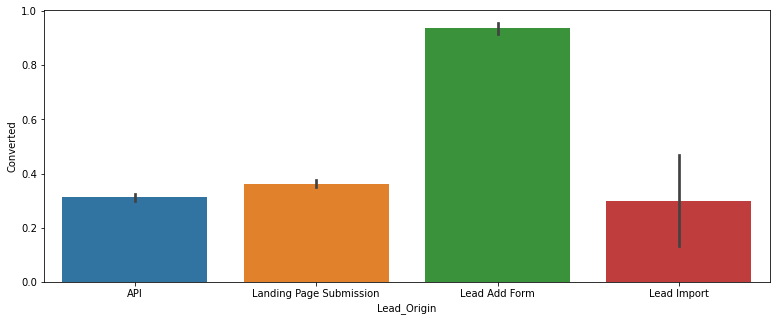

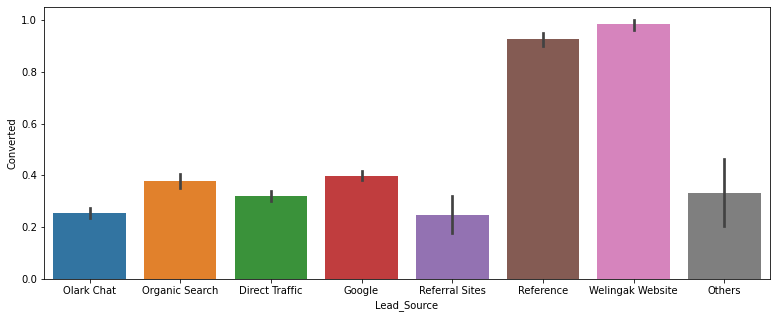

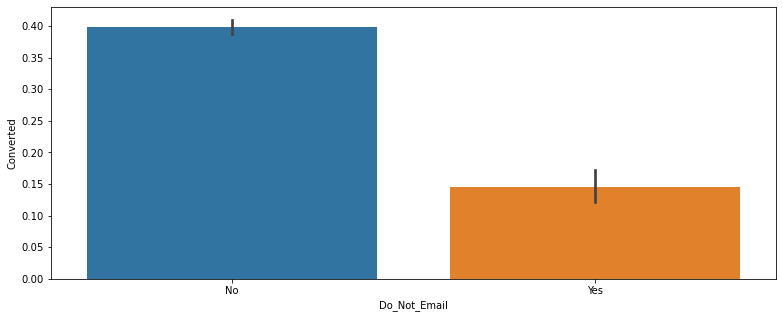

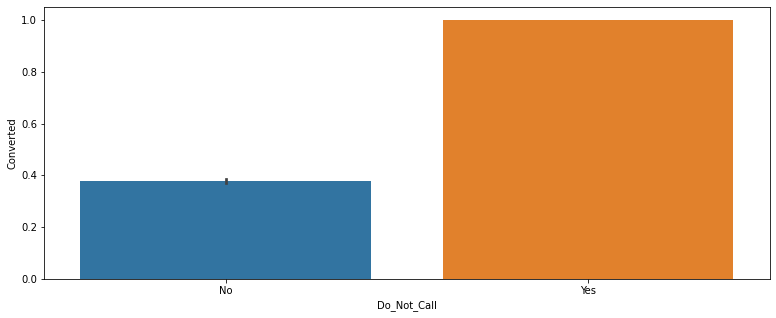

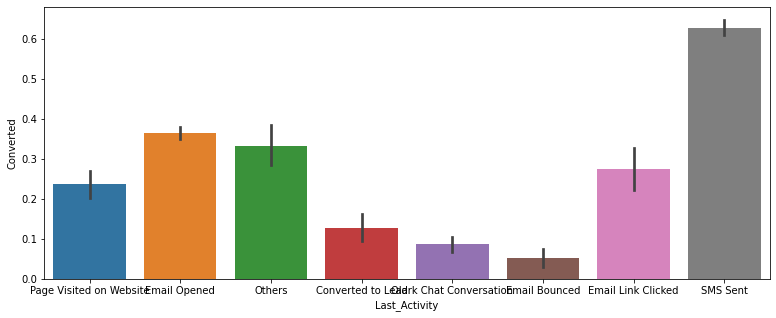

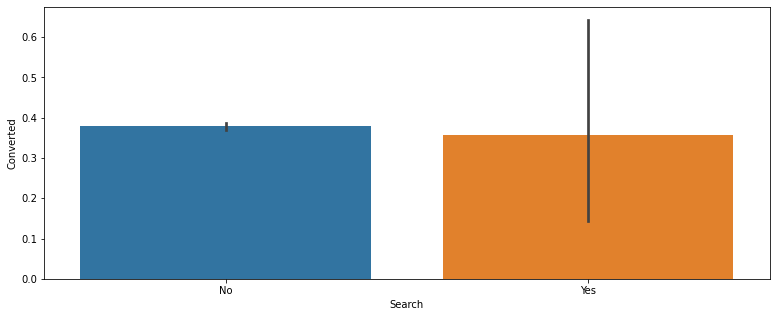

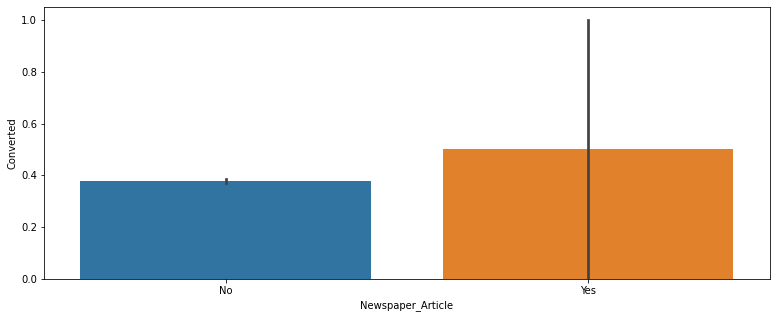

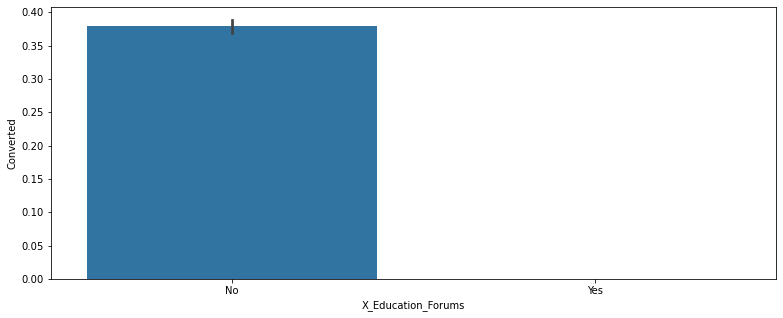

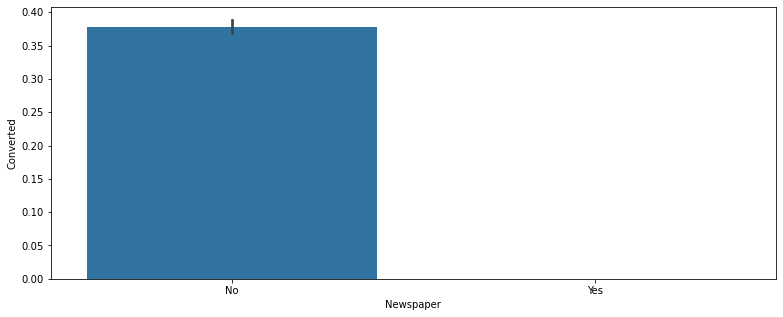

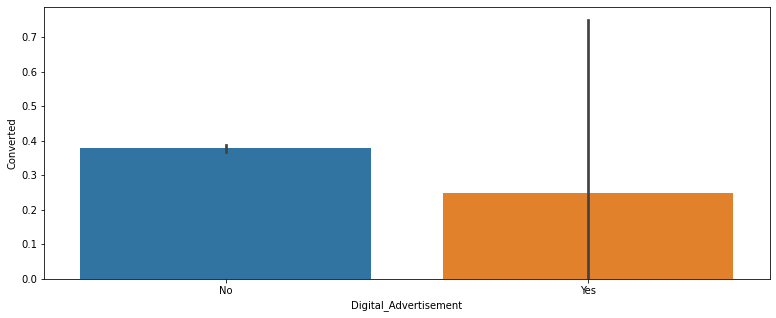

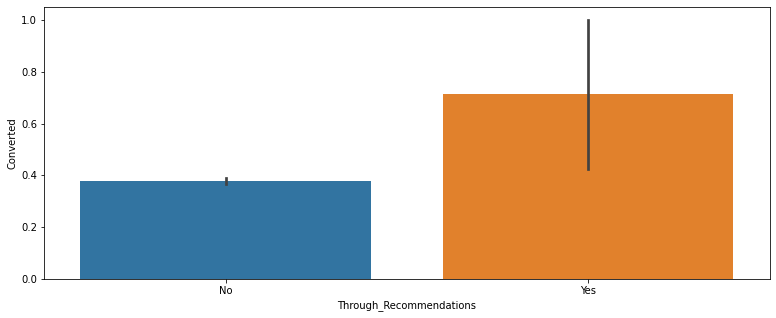

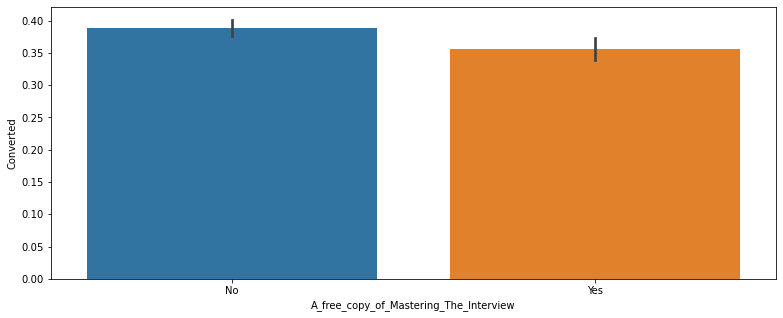

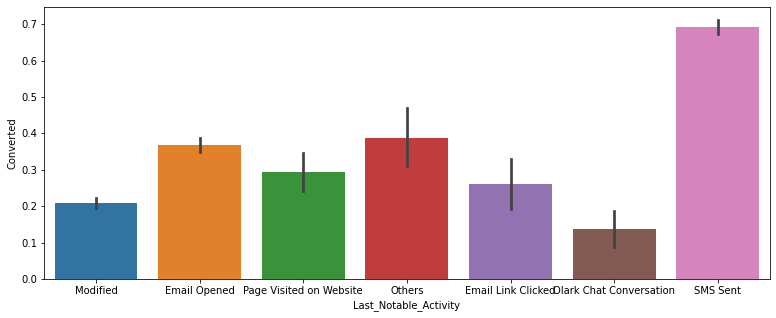

In [55]:
# Target and categorical columns

for i in cat:
    
    plt.figure(figsize=(13,5))
    sns.barplot(data=df,y='Converted',x=i)

/var/folders/7g/jzpxq8rj3z75n6b0tk74k2w40000gn/T/ipykernel_66990/4103809882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

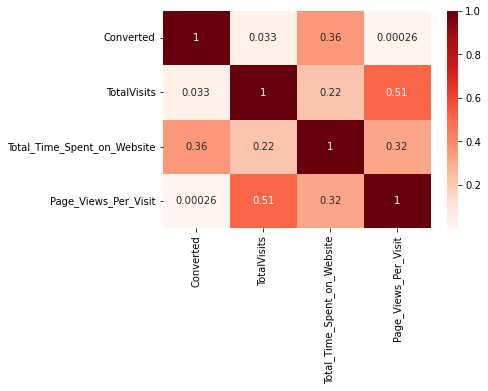

In [56]:
# Heatmap for correlation

corr = df.corr()

sns.heatmap(corr,annot=True,cmap='Reds')

In [57]:
# There is a significant Corelation observed, but since both will be evaluated later 
#using VIF hence keeping them

# TRAIN TEST SPLIT AND PREPROCESSING

In [58]:
# train test split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(df1.drop(columns='Converted'),
                                    df1['Converted'],random_state=4,stratify=df1['Converted'])

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6805, 16), (2269, 16), (6805,), (2269,))

In [62]:
## Capping the outliers at 98 percentile 

In [63]:
x_train.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,6805.000000,6805.000000,6805.000000
mean,3.435415,480.236738,2.367337
std,4.923830,542.058247,2.189838
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,245.000000,2.000000
75%,5.000000,920.000000,3.000000
max,251.000000,2253.000000,55.000000


In [64]:
x_test.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,2269.000000,2269.000000,2269.000000
mean,3.517849,490.837373,2.378590
std,4.658843,554.783032,2.072012
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,935.000000,3.330000
max,141.000000,2272.000000,16.000000


/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

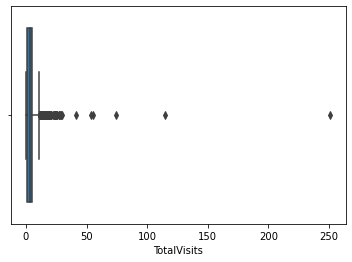

In [65]:
sns.boxplot(x_train.TotalVisits)

In [66]:
# Columns = TotalVisits

upper = x_train.TotalVisits.quantile(0.98)
print(upper)

out_drop_train = -(x_train.TotalVisits > upper)
out_drop_test = -(x_test.TotalVisits > upper)

x_train = x_train[out_drop_train]
x_test = x_test[out_drop_test]

y_train = y_train[x_train.index]
y_test = y_test[x_test.index]

13.0


/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

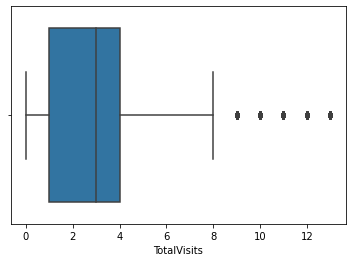

In [67]:
sns.boxplot(x_train.TotalVisits)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page_Views_Per_Visit'>

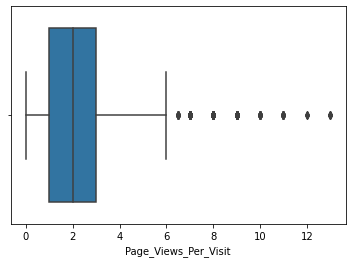

In [68]:
sns.boxplot(x_train['Page_Views_Per_Visit'])

In [69]:
# Columns = 'Page Views Per Visit'

upper = x_train['Page_Views_Per_Visit'].quantile(0.98)

print(upper)


out_drop_train = -(x_train['Page_Views_Per_Visit'] > upper) 
out_drop_test = -(x_test['Page_Views_Per_Visit'] > upper) 

x_train = x_train[out_drop_train]
x_test = x_test[out_drop_test]

y_train = y_train[x_train.index]
y_test = y_test[x_test.index]

8.0


/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page_Views_Per_Visit'>

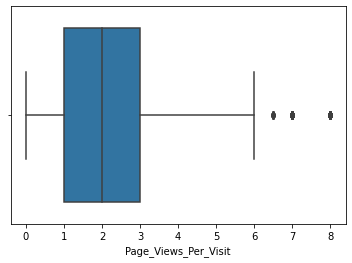

In [70]:
sns.boxplot(x_train['Page_Views_Per_Visit'])

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Time_Spent_on_Website'>

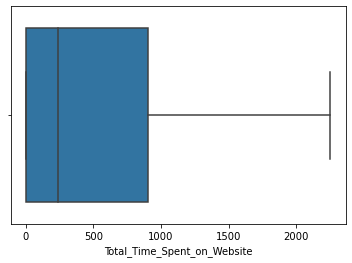

In [71]:
sns.boxplot(x_train['Total_Time_Spent_on_Website'])

In [72]:
# no need for outlier treatment for this column

In [73]:
x_train.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,6605.000000,6605.000000,6605.000000
mean,3.002271,472.262226,2.225261
std,2.645779,539.723619,1.836104
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000
50%,3.000000,238.000000,2.000000
75%,4.000000,903.000000,3.000000
max,13.000000,2253.000000,8.000000


In [74]:
x_test.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,2199.000000,2199.000000,2199.000000
mean,3.071851,485.022738,2.231637
std,2.705826,554.393833,1.815512
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,241.000000,2.000000
75%,5.000000,907.500000,3.000000
max,13.000000,2272.000000,8.000000


In [75]:
## Converting the small chunks of data as others for better modelling
x_train['Last_Activity'].value_counts(normalize=True)


Email Opened                    0.373354
SMS Sent                        0.305375
Olark Chat Conversation         0.110825
Page Visited on Website         0.063437
Converted to Lead               0.047237
Email Bounced                   0.036790
Email Link Clicked              0.029523
Form Submitted on Website       0.013020
Unreachable                     0.010144
Unsubscribed                    0.006056
Had a Phone Conversation        0.002574
Approached upfront              0.000757
View in browser link Clicked    0.000303
Email Marked Spam               0.000303
Email Received                  0.000151
Visited Booth in Tradeshow      0.000151
Name: Last_Activity, dtype: float64

In [76]:
x_train['Last_Activity'].replace(to_replace=
                        ['Form Submitted on Website','Unreachable','Unsubscribed',
                         'Had a Phone Conversation','Approached upfront',
                         'View in browser link Clicked','Email Received','Email Marked Spam'
                         ,'Visited Booth in Tradeshow','Resubscribed to emails'],
                        value='Others', inplace=True)

x_test['Last_Activity'].replace(to_replace=
                        ['Form Submitted on Website','Unreachable','Unsubscribed',
                         'Had a Phone Conversation','Approached upfront',
                         'View in browser link Clicked','Email Received','Email Marked Spam'
                         ,'Visited Booth in Tradeshow','Resubscribed to emails'],
                        value='Others', inplace=True)

<AxesSubplot:>

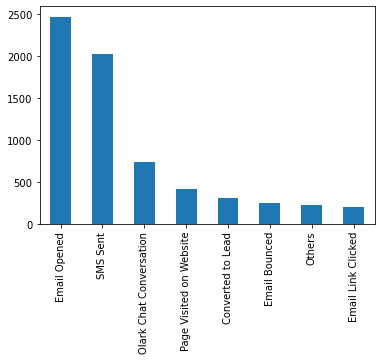

In [77]:
x_train['Last_Activity'].value_counts().plot.bar()

In [78]:
## Converting the small chunks of data as others for better modelling.
x_train['Last_Notable_Activity'].value_counts(normalize=True)

Modified                     0.364875
Email Opened                 0.305526
SMS Sent                     0.242846
Page Visited on Website      0.029674
Olark Chat Conversation      0.020590
Email Link Clicked           0.019076
Email Bounced                0.007116
Unsubscribed                 0.004542
Unreachable                  0.003482
Had a Phone Conversation     0.001514
Email Marked Spam            0.000303
Approached upfront           0.000151
Form Submitted on Website    0.000151
Email Received               0.000151
Name: Last_Notable_Activity, dtype: float64

In [79]:
x_train['Last_Notable_Activity'].replace(to_replace=
                ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',
                 'Email Marked Spam','Approached upfront','Resubscribed to emails',
                 'View in browser link Clicked','Form Submitted on Website',
                 'Email Received'],value='Others', inplace=True)

x_test['Last_Notable_Activity'].replace(to_replace=
                ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',
                 'Email Marked Spam','Approached upfront','Resubscribed to emails',
                 'View in browser link Clicked','Form Submitted on Website',
                 'Email Received'],value='Others', inplace=True)

<AxesSubplot:>

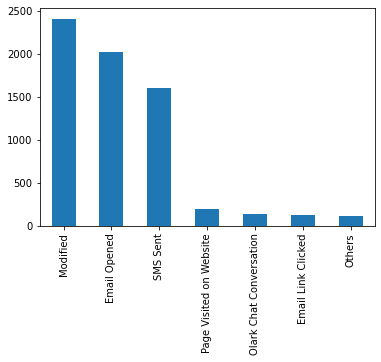

In [80]:
x_train['Last_Notable_Activity'].value_counts().plot.bar()

In [81]:
x_train['Lead_Source'].value_counts(normalize=True)

Google               0.319455
Direct Traffic       0.279182
Olark Chat           0.199092
Organic Search       0.118244
Reference            0.051930
Welingak Website     0.013323
Referral Sites       0.012415
Facebook             0.003785
bing                 0.000757
Click2call           0.000454
google               0.000454
Social Media         0.000151
welearnblog_Home     0.000151
Press_Release        0.000151
Pay per Click Ads    0.000151
testone              0.000151
NC_EDM               0.000151
Name: Lead_Source, dtype: float64

In [82]:
## Imputing similar data for better understanding and 
## Converting to 'Others' for better modelling

x_train['Lead_Source'].replace(to_replace=['welearnblog_Home','WeLearn','blog'],
                          value='We Learn Blog',inplace=True)
x_train['Lead_Source'].replace(to_replace='google',value='Google',inplace=True)
x_train['Lead_Source'].replace(to_replace=['Facebook','youtubechannel'],
                          value='Social Media',inplace=True)
x_train['Lead_Source'].replace(to_replace=['Social Media','bing','Click2call','Live Chat',
                        'We Learn Blog','Pay per Click Ads','testone','Press_Release',
                            'NC_EDM'], value='Others',inplace=True)


x_test['Lead_Source'].replace(to_replace=['welearnblog_Home','WeLearn','blog'],
                          value='We Learn Blog',inplace=True)
x_test['Lead_Source'].replace(to_replace='google',value='Google',inplace=True)
x_test['Lead_Source'].replace(to_replace=['Facebook','youtubechannel'],
                          value='Social Media',inplace=True)
x_test['Lead_Source'].replace(to_replace=['Social Media','bing','Click2call','Live Chat',
                        'We Learn Blog','Pay per Click Ads','testone','Press_Release',
                            'NC_EDM'], value='Others',inplace=True)

<AxesSubplot:>

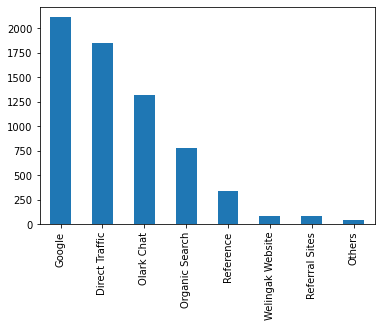

In [83]:
x_train['Lead_Source'].value_counts().plot.bar()

In [84]:
# Separating numerical and categorical columns
cat1 = [x for x in x_train.columns if x_train[x].dtype=='O']
num1 = [ x for x in x_train.columns if x not in cat1]

In [85]:
# onehot encoding categorical columns and scaling numerical columns  

In [86]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [87]:
# Onehot Encoding

In [88]:
onehot = OneHotEncoder(drop='first',sparse=False,handle_unknown='error')
onehot.fit(x_train[cat1])

OneHotEncoder(drop='first', sparse=False)

In [89]:
l = list(onehot.get_feature_names_out())

In [90]:
onehot_train = pd.DataFrame(onehot.transform(x_train[cat1]),columns=l)
onehot_test = pd.DataFrame(onehot.transform(x_test[cat1]),columns=l)

In [91]:
onehot_train.index = x_train.index
onehot_test.index = x_test.index

In [92]:
x_train = pd.concat([x_train.drop(columns=cat1),onehot_train],axis=1)
x_test = pd.concat([x_test.drop(columns=cat1),onehot_test],axis=1)

In [93]:
#Standarize

In [94]:
scale = StandardScaler()
scale.fit(x_train[num1])

StandardScaler()

In [95]:
x_train[num1] = scale.transform(x_train[num1])
x_test[num1] = scale.transform(x_test[num1])

# LOGISTIC REGRESSION MODEL BUILDING

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [98]:
# defining a function to find metrics for different models

def model_build(columns,x_train,x_test,y_train,y_test,name='logistic',stats=False):
    
    #model fitting
    model = LogisticRegression(max_iter=500,random_state=33)
    model.fit(x_train[columns],y_train)
    
    # train prediction
    y_train_pred1 = model.predict(x_train[columns])
    #test prediction
    y_test_pred1 = model.predict(x_test[columns])
    
    
    print('\n',name,'\n')
    # classification report for train and test set
    print('train metrics: ',classification_report(y_train,y_train_pred1))
    
    print('\n','test metrics: ',classification_report(y_test,y_test_pred1))
    print('=====================================================================','\n')
    
    #building model using statsmodels
    if stats == True:
        x_c = sm.add_constant(x_train[columns])
        log = sm.GLM( y_train, x_c, family=sm.families.Binomial() ).fit()
        print(log.summary())

In [99]:
# COLUMNS IN X_TRAIN
col = x_train.columns

In [100]:
# METRICS FOR MODEL

model_build(col,x_train,x_test,y_train,y_test)


 logistic 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.66      0.71       833

    accuracy                           0.79      2199
   macro avg       0.78      0.77      0.77      2199
weighted avg       0.79      0.79      0.79      2199




In [101]:
# precision,recall,f1 score and accuracy all are good for both test and train set

In [102]:
# model building with statsmodel(finding pvalues)

model_build(col,x_train,x_test,y_train,y_test,stats=True)



 logistic 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.66      0.71       833

    accuracy                           0.79      2199
   macro avg       0.78      0.77      0.77      2199
weighted avg       0.79      0.79      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6571
Model Family:                Binomial   Df Model:             

# Feature Selection using RFE

In [103]:
# NUMBER OF COLUMNS IN X_TRAIN
len(col)

33

In [104]:
from sklearn.feature_selection import RFE

In [105]:
# finding the right number of features using RFE

for i in range(10,30):
    
    rfe = RFE(LogisticRegression(max_iter=500,random_state=33),n_features_to_select=i)
    rfe.fit(x_train,y_train)
    l= list(rfe.get_feature_names_out())
    
    print('\n','number of columns: ',i)
    print('\n','columns: ',l)
    model_build(l,x_train,x_test,y_train,y_test,name='rfe')
    


 number of columns:  10

 columns:  ['Total_Time_Spent_on_Website', 'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat', 'Lead_Source_Reference', 'Lead_Source_Welingak Website', 'Do_Not_Email_Yes', 'Last_Activity_Email Opened', 'Last_Activity_SMS Sent', 'Last_Notable_Activity_Others', 'Last_Notable_Activity_SMS Sent']

 rfe 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.77      0.67      0.72      2487

    accuracy                           0.80      6605
   macro avg       0.80      0.78      0.78      6605
weighted avg       0.80      0.80      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.80      0.87      0.83      1366
           1       0.75      0.64      0.69       833

    accuracy                           0.78      2199
   macro avg       0.77      0.75      0.76      2199
weighted avg       0.78      0.78    


 number of columns:  17

 columns:  ['Total_Time_Spent_on_Website', 'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import', 'Lead_Source_Olark Chat', 'Lead_Source_Reference', 'Lead_Source_Welingak Website', 'Do_Not_Email_Yes', 'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others', 'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent', 'Newspaper_Yes', 'Through_Recommendations_Yes', 'Last_Notable_Activity_Others', 'Last_Notable_Activity_SMS Sent']

 rfe 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.77      0.68      0.72      2487

    accuracy                           0.80      6605
   macro avg       0.80      0.78      0.78      6605
weighted avg       0.80      0.80      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.80      0.87    


 number of columns:  24

 columns:  ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import', 'Lead_Source_Google', 'Lead_Source_Olark Chat', 'Lead_Source_Others', 'Lead_Source_Reference', 'Lead_Source_Welingak Website', 'Do_Not_Email_Yes', 'Do_Not_Call_Yes', 'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others', 'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent', 'Newspaper_Yes', 'Digital_Advertisement_Yes', 'Through_Recommendations_Yes', 'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Others', 'Last_Notable_Activity_SMS Sent']

 rfe 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.69      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      

In [106]:
# 16 columns are giving us almost exact same results as 33 columns,
# hence selecting 16 columns

In [107]:
# FINDING METRICS WHEN USING 16 COLUMNS SELECTED BY RFE

rfe = RFE(LogisticRegression(max_iter=500,random_state=33),n_features_to_select=23)
rfe.fit(x_train,y_train)
l= list(rfe.get_feature_names_out())

model_build(l,x_train,x_test,y_train,y_test,name='rfe(16)')


 rfe(16) 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.69      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.81      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199




In [108]:
#SELECTED COLUMNS
l

['TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit',
 'Lead_Origin_Lead Add Form',
 'Lead_Origin_Lead Import',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Others',
 'Lead_Source_Reference',
 'Lead_Source_Welingak Website',
 'Do_Not_Email_Yes',
 'Do_Not_Call_Yes',
 'Last_Activity_Email Link Clicked',
 'Last_Activity_Email Opened',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_Others',
 'Last_Activity_Page Visited on Website',
 'Last_Activity_SMS Sent',
 'Newspaper_Yes',
 'Digital_Advertisement_Yes',
 'Through_Recommendations_Yes',
 'Last_Notable_Activity_Others',
 'Last_Notable_Activity_SMS Sent']

# using p value and vif to narrow down more number of columns

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
# defining a function to find metrics for different models and VIF

def model_build_vif(columns,x_train,x_test,y_train,y_test,name='logistic',
                    stats=False,vif=False):
    
    #model fitting
    model = LogisticRegression(max_iter=500,random_state=33)
    model.fit(x_train[columns],y_train)
    
    # train prediction
    y_train_pred1 = model.predict(x_train[columns])
    #test prediction
    y_test_pred1 = model.predict(x_test[columns])
    
    
    print('\n',name,'\n')
    # classification report for train and test set
    print('train metrics: ',classification_report(y_train,y_train_pred1))
    
    print('\n','test metrics: ',classification_report(y_test,y_test_pred1))
    print('=====================================================================','\n')
    
    #building model using statsmodels
    if stats == True:
        x_c = sm.add_constant(x_train[columns])
        log = sm.GLM(y_train,x_c,family=sm.families.Binomial()).fit()
        print(log.summary())
        
    # finding VIF
    if vif == True:
        
        vif = pd.DataFrame()
        vif['feature'] = columns
        vif['vif']=[variance_inflation_factor(x_train[columns].to_numpy(),i) for i
                    in range(len(columns))]
        vif = vif.sort_values(by='vif',ascending=False)
        print('\n',vif)


In [111]:
# Finding metrics,pvalues and vif for model using 23 selected columns

model_build_vif(l,x_train,x_test,y_train,y_test,stats=True,vif=True)


 logistic 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.69      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.81      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6581
Model Family:                Binomial   Df Model:             

In [112]:
# dropping Lead_Source_Reference which has high vif

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)



 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.69      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.81      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.88      0.84      1366
           1       0.77      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6582
Model Family:                Binomial   Df Model:                  

In [113]:
# dropping Last_Activity_SMS Sent which has high vif value

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Last_Activity_SMS Sent',
                        ]))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)
         


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6583
Model Family:                Binomial   Df Model:                  

In [114]:
# dropping Do Not Call_Yes which has high p value

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)
         


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6584
Model Family:                Binomial   Df Model:                  

In [115]:
# dropping Digital Advertisement_Yes which has high p value

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6585
Model Family:                Binomial   Df Model:                  

In [116]:
# dropping Newspaper_Yes which has high p value


l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6586
Model Family:                Binomial   Df Model:                  

In [117]:
# dropping Last Activity_Others which has high p value

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.79      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.79      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6587
Model Family:                Binomial   Df Model:                  

In [118]:
# dropping Lead Source_Others which has high p value

l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.80      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.80      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6588
Model Family:                Binomial   Df Model:                  

In [119]:
# dropping Last Activity_Email Link Clicked which has high p value


l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others',
                       'Last_Activity_Email Link Clicked']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.81      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.79      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.79      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6589
Model Family:                Binomial   Df Model:                  

In [120]:


# dropping Through_Recommendations_Yes  which has high p value


l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others',
                       'Last_Activity_Email Link Clicked','Through_Recommendations_Yes']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.79      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.79      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6590
Model Family:                Binomial   Df Model:                  

In [121]:
# dropping Lead_Source_Welingak Website  which has high p value
l2 = l
l2 =list(set(l2) - set(['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others',
                       'Last_Activity_Email Link Clicked','Through_Recommendations_Yes',
                       'Lead_Source_Welingak Website']))

# Finding metrics,pvalues and vif

model_build_vif(l2,x_train,x_test,y_train,y_test,name='vif',stats=True,vif=True)


 vif 

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.79      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.79      0.79      2199


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6591
Model Family:                Binomial   Df Model:                  

In [122]:
# all metrics are good, vif and p value is low

In [123]:
'''
dropping columns:
'Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others',
                       'Last_Activity_Email Link Clicked','Through_Recommendations_Yes',
                       'Lead_Source_Welingak Website'

'''
ll = ['Lead_Source_Reference','Do_Not_Call_Yes',
                        'Last_Activity_SMS Sent','Digital_Advertisement_Yes',
                       'Newspaper_Yes','Last_Activity_Others','Lead_Source_Others',
                       'Last_Activity_Email Link Clicked','Through_Recommendations_Yes',
                       'Lead_Source_Welingak Website']


final_columns = list(set(l)-set(ll))

In [124]:
# final selected features

final_columns

['Do_Not_Email_Yes',
 'Page_Views_Per_Visit',
 'Last_Notable_Activity_Others',
 'Lead_Source_Google',
 'Last_Activity_Olark Chat Conversation',
 'Lead_Origin_Lead Add Form',
 'Last_Activity_Email Opened',
 'Total_Time_Spent_on_Website',
 'Last_Activity_Page Visited on Website',
 'Last_Notable_Activity_SMS Sent',
 'Lead_Source_Olark Chat',
 'TotalVisits',
 'Lead_Origin_Lead Import']

# Final Model 

## USING PROBABILITIES AS A SUBSTITUE FOR SCORE

In [125]:
# Building the model with selected features

model = LogisticRegression(max_iter=500,random_state=33)
model.fit(x_train[final_columns],y_train)

LogisticRegression(max_iter=500, random_state=33)

In [126]:
# METRICS FOR MODEL WITH SELECTED FEATURE
    
# train prediction
y_train_pred1 = model.predict(x_train[final_columns])
#test prediction
y_test_pred1 = model.predict(x_test[final_columns])

print('train metrics: ',classification_report(y_train,y_train_pred1))

print('\n','test metrics: ',classification_report(y_test,y_test_pred1))

train metrics:                precision    recall  f1-score   support

           0       0.82      0.88      0.85      4118
           1       0.78      0.68      0.73      2487

    accuracy                           0.81      6605
   macro avg       0.80      0.78      0.79      6605
weighted avg       0.80      0.81      0.80      6605


 test metrics:                precision    recall  f1-score   support

           0       0.81      0.87      0.84      1366
           1       0.76      0.67      0.71       833

    accuracy                           0.79      2199
   macro avg       0.79      0.77      0.78      2199
weighted avg       0.79      0.79      0.79      2199



In [127]:
# ROC AUC SCORE
from sklearn.metrics import roc_auc_score

# train prediction
y_train_pred1 = model.predict_proba(x_train[final_columns])[:,1]
#test prediction
y_test_pred1 = model.predict_proba(x_test[final_columns])[:,1]

print('train roc: ',roc_auc_score(y_train,y_train_pred1))

print('\n','test roc: ',roc_auc_score(y_test,y_test_pred1))

train roc:  0.8716427413809702

 test roc:  0.8582695157125808


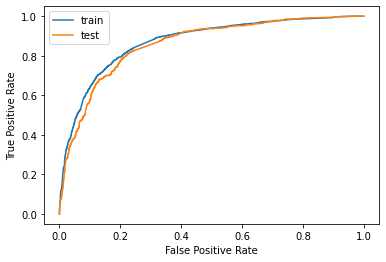

In [128]:
# ROC CURVE

from sklearn.metrics import roc_curve

fpr,tpr,_ = roc_curve(y_train,y_train_pred1,)
fpr1,tpr1,_ = roc_curve(y_test,y_test_pred1,)

plt.plot(fpr,tpr,label='train')
plt.plot(fpr1,tpr1,label='test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

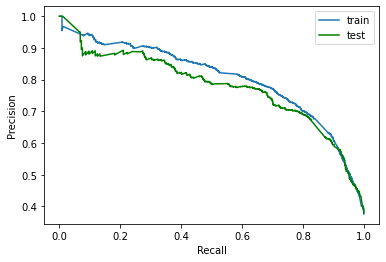

In [129]:
# Precision Recall CURVE

from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(y_train,y_train_pred1,)
p1,r1,t1 = precision_recall_curve(y_test,y_test_pred1,)

plt.plot(r,p,label='train')
plt.plot(r1,p1,label='test',c='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

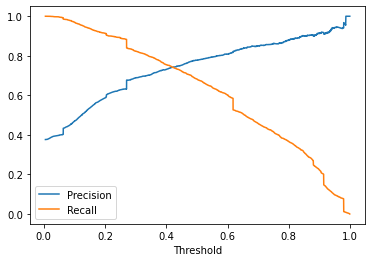

In [130]:
# FINDING OPTIMAL THRESHOLD

p,r,t = precision_recall_curve(y_train,y_train_pred1,)


plt.plot(t,p[:-1],label='Precision')
plt.plot(t,r[:-1],label='Recall')
plt.xlabel('Threshold')

plt.legend()
plt.show()

In [131]:
# OPTIMAL THRESHOLD IS 0.4

In [132]:
#  FINDING TOP FEATURES

top_variable = pd.DataFrame()
top_variable['features'] = final_columns
top_variable['coef'] = np.array(list(model.coef_)).reshape(-1,1)
top_variable['absolute_coef'] = abs(top_variable['coef'])
top_variable.sort_values(by='absolute_coef',inplace=True,ascending=False)
top_variable.drop(columns='absolute_coef',inplace=True)
top_variable

,features,coef
5,Lead_Origin_Lead Add Form,4.722356
9,Last_Notable_Activity_SMS Sent,1.841438
0,Do_Not_Email_Yes,-1.578327
2,Last_Notable_Activity_Others,1.439108
10,Lead_Source_Olark Chat,1.371932
4,Last_Activity_Olark Chat Conversation,-1.329764
7,Total_Time_Spent_on_Website,1.118691
12,Lead_Origin_Lead Import,0.996951
6,Last_Activity_Email Opened,0.367218
11,TotalVisits,0.307385


In [133]:
'''
Last_Notable_Activity_Others include following:

'Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',
                 'Email Marked Spam','Approached upfront','Resubscribed to emails',
                 'View in browser link Clicked','Form Submitted on Website',
                 'Email Received'
'''

"\nLast_Notable_Activity_Others include following:\n\n'Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',\n                 'Email Marked Spam','Approached upfront','Resubscribed to emails',\n                 'View in browser link Clicked','Form Submitted on Website',\n                 'Email Received'\n"

In [134]:
# defining a function to calculate score(between 0 to 100)

def find_score(x):
    
    score = np.ceil(model.predict_proba(x[final_columns])[:,1] *100)
    return score

In [135]:
# scores for training set

score = find_score(x_train)

# new dataframe for comparing score with target(converted)

score_train = pd.DataFrame()
score_train['converted']=y_train
score_train['score']=score

In [136]:
# checking converted(original target) and scores

score_train[['converted','score']].head(50)

,converted,score
2188,1,15.0
8809,0,23.0
5410,0,17.0
2785,1,11.0
5963,0,7.0
8256,0,6.0
3463,1,98.0
4077,0,16.0
4336,0,55.0
1017,0,59.0


In [137]:
# full score for train set
list(zip(score_train['converted'],score_train['score']))

[(1, 15.0),
 (0, 23.0),
 (0, 17.0),
 (1, 11.0),
 (0, 7.0),
 (0, 6.0),
 (1, 98.0),
 (0, 16.0),
 (0, 55.0),
 (0, 59.0),
 (1, 53.0),
 (1, 60.0),
 (0, 25.0),
 (0, 15.0),
 (1, 98.0),
 (0, 28.0),
 (0, 48.0),
 (0, 9.0),
 (0, 7.0),
 (0, 30.0),
 (1, 62.0),
 (0, 8.0),
 (0, 7.0),
 (0, 47.0),
 (0, 10.0),
 (1, 42.0),
 (1, 49.0),
 (1, 50.0),
 (0, 17.0),
 (1, 80.0),
 (0, 2.0),
 (0, 18.0),
 (0, 4.0),
 (0, 10.0),
 (0, 2.0),
 (1, 58.0),
 (1, 43.0),
 (1, 91.0),
 (0, 9.0),
 (0, 37.0),
 (1, 28.0),
 (0, 11.0),
 (0, 23.0),
 (1, 63.0),
 (0, 20.0),
 (1, 84.0),
 (1, 62.0),
 (0, 2.0),
 (1, 76.0),
 (0, 10.0),
 (1, 76.0),
 (0, 8.0),
 (1, 55.0),
 (1, 62.0),
 (0, 4.0),
 (0, 3.0),
 (0, 4.0),
 (0, 9.0),
 (0, 3.0),
 (0, 25.0),
 (1, 92.0),
 (0, 4.0),
 (0, 3.0),
 (0, 39.0),
 (1, 56.0),
 (1, 62.0),
 (1, 80.0),
 (0, 13.0),
 (0, 7.0),
 (0, 30.0),
 (0, 68.0),
 (0, 10.0),
 (0, 9.0),
 (0, 18.0),
 (1, 49.0),
 (0, 16.0),
 (0, 28.0),
 (0, 21.0),
 (0, 14.0),
 (1, 76.0),
 (1, 59.0),
 (0, 27.0),
 (1, 62.0),
 (1, 85.0),
 (0, 11.0),
 

In [138]:
# scores for training set

score_t = find_score(x_test)

# new dataframe for comparing score with target(converted)

score_test = pd.DataFrame()
score_test['converted']=y_test
score_test['score']=score_t

# full score for train set
list(zip(score_test['converted'],score_test['score']))

[(0, 17.0),
 (0, 7.0),
 (0, 24.0),
 (1, 57.0),
 (0, 14.0),
 (0, 11.0),
 (1, 21.0),
 (1, 82.0),
 (1, 84.0),
 (1, 98.0),
 (1, 33.0),
 (1, 72.0),
 (0, 7.0),
 (1, 81.0),
 (0, 2.0),
 (1, 83.0),
 (1, 28.0),
 (1, 51.0),
 (0, 2.0),
 (0, 45.0),
 (0, 26.0),
 (0, 19.0),
 (0, 33.0),
 (1, 93.0),
 (0, 16.0),
 (1, 65.0),
 (1, 28.0),
 (0, 9.0),
 (0, 5.0),
 (0, 12.0),
 (0, 10.0),
 (1, 62.0),
 (0, 6.0),
 (0, 51.0),
 (0, 15.0),
 (0, 10.0),
 (0, 9.0),
 (1, 38.0),
 (1, 91.0),
 (1, 16.0),
 (0, 80.0),
 (0, 28.0),
 (0, 28.0),
 (0, 7.0),
 (0, 54.0),
 (0, 10.0),
 (1, 14.0),
 (0, 14.0),
 (0, 28.0),
 (0, 13.0),
 (1, 98.0),
 (1, 87.0),
 (1, 28.0),
 (0, 12.0),
 (0, 7.0),
 (1, 95.0),
 (1, 83.0),
 (0, 7.0),
 (1, 14.0),
 (1, 35.0),
 (1, 55.0),
 (0, 2.0),
 (0, 24.0),
 (0, 19.0),
 (1, 57.0),
 (0, 43.0),
 (0, 41.0),
 (1, 11.0),
 (1, 22.0),
 (1, 96.0),
 (0, 7.0),
 (0, 12.0),
 (0, 19.0),
 (1, 55.0),
 (0, 45.0),
 (0, 7.0),
 (1, 91.0),
 (1, 10.0),
 (0, 44.0),
 (1, 71.0),
 (0, 16.0),
 (0, 6.0),
 (0, 10.0),
 (0, 92.0),
 (0, 3.

In [139]:
# checking converted(original target) and scores

score_test[['converted','score']].head(50)


,converted,score
1496,0,17.0
1237,0,7.0
7077,0,24.0
1728,1,57.0
4796,0,14.0
3621,0,11.0
833,1,21.0
3685,1,82.0
3232,1,84.0
7482,1,98.0
